#**CLASSIFICATION : TRUE VS FALSE AVEC ENTITES_NOMMEES**

**Membres:** Hadjoudja Bachir (21811363), Zeggar Rym (21909615), Bendahmane Rania (21811387), Labiad Youcef (21710780).

In [ ]:
import sys
import pandas as pd
import numpy as np 
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize
import re
import pickle
import string
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import vstack
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear, ReLU, Sigmoid, Module, BCELoss
from torch.optim import SGD
from torch.nn.init import kaiming_uniform_, xavier_uniform_


kn= KNeighborsClassifier()
decTree=DecisionTreeClassifier()
gNB=GaussianNB()
svc=SVC()
rf=RandomForestClassifier()


In [ ]:
import warnings
warnings.filterwarnings('ignore')

autorisation

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
my_local_drive='/content/gdrive/My Drive/Colab Notebooks'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive
%ls

%pwd

/content/gdrive/My Drive/Colab Notebooks
'Copie de bonFakeNEWS.ipynb'
'Copie de Copie de Projet ML FakeNEWS_TRUE FALSE_TEXT+TITRE.ipynb'
'Copie de ml_entiteesNommeesTest (1).ipynb'
'Copie de ml_entiteesNommeesTest.ipynb'
'Copie de Projet ML FakeNEWS (1).ipynb'
'Copie de Projet ML FakeNEWS.ipynb'
'Copie de Projet ML FakeNEWS_TRUE FALSE_TEXT+TITRE.ipynb'
'Copie de text_title en mm temps.ipynb'
'Copie de version2ml_entiteesNommeesTest.ipynb'
'Copie de Vrai_Faux.ipynb'
'copie_essai_title_text sur bachir.ipynb'
'essai title_text.ipynb'
'Projet ML FakeNEWS_TRUE FALSE_TEXT_AVEC_ENTITES.ipynb'
'Projet ML FakeNEWS_TRUE FALSE_TITRE_AVEC_ENTITES.ipynb'
'Traitement sémantique'/
 Vrai_Faux_avec_entites_nommées.ipynb


'/content/gdrive/My Drive/Colab Notebooks'

La fonction qui sera utilisée pour les prétraitements: MyCleanText 
* Mettre le texte en minuscule
* Se débarasser des stopwords
* Se débarasser des nombres
* Stemmatisation
* Lemmatisation ..


La fonction MyshowAllScores prend le y_test et le y_predict, affiche l'accuracy et le classification report avec la matrice de confusion.

In [ ]:
#...................................................Fonction MyCleanText .............................................................................
# mettre en minuscule
#enlever les stopwords
#se debarasser des nombres
#stemmatisation
#lemmatisation 
#......................................................................................................................................................


nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
#liste des stopwords en anglais
stop_words = set(stopwords.words('english')) 

def MyCleanText(X,
                lowercase=False, #mettre en minuscule
                removestopwords=False, #supprimer les stopwords
                removedigit=False, #supprimer les nombres
                getstemmer=False, #conserver la racine des termes
                getlemmatisation=False #lemmatisation des termes
                ):
  #conversion du texte d'entrée en chaîne de caractères
    sentence=str(X)
    #suppression des caractères spéciaux
    sentence = re.sub(r'[^\w\s]',' ', sentence)
    # suppression de tous les caractères uniques
    sentence = re.sub(r'\s+[a-zA-Z]\s+', ' ', sentence)
    # substitution des espaces multiples par un seul espace
    sentence = re.sub(r'\s+', ' ', sentence, flags=re.I)

    # decoupage en mots
    tokens = word_tokenize(sentence)
    if lowercase:
          tokens = [token.lower() for token in tokens]

    # suppression ponctuation
    table = str.maketrans('', '', string.punctuation)
    words = [token.translate(table) for token in tokens]

    # suppression des tokens non alphabetique ou numerique
    words = [word for word in words if word.isalnum()]
    
    # suppression des tokens numerique
    if removedigit:
        words = [word for word in words if not word.isdigit()]

    # suppression des stopwords
    if removestopwords:
        words = [word for word in words if not word in stop_words]

    # lemmatisation
    if getlemmatisation:
        lemmatizer=WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word)for word in words]
        

    # racinisation
    if getstemmer:
        ps = PorterStemmer()
        words=[ps.stem(word) for word in words]
        
    sentence= ' '.join(words)
  
    return sentence   



def MyshowAllScores(y_test,y_pred):
  classes= np.unique(y_test)
  print("Accuracy : %0.3f"%(accuracy_score(y_test,y_pred)))
  print("Classification Report")
  print(classification_report(y_test,y_pred,digits=5))    
  cnf_matrix = confusion_matrix(y_test,y_pred)
  disp=ConfusionMatrixDisplay(cnf_matrix,display_labels=classes)
  disp.plot()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


* La classe TextNormalizer qui contiendra la fonction MyCleanText.

* Fit_transform de mon corpus propre.

In [ ]:
#..................................................Etape 1 : prétraitement du texte ...................................................................................................
#...................................................Fonction TextNormalizer  .............................................................................
#fit_transform de mon corpus propre 
#......................................................................................................................................................

from sklearn.base import BaseEstimator, TransformerMixin

class TextNormalizer(BaseEstimator, TransformerMixin):
    def __init__(self, 
                 removestopwords=False, # suppression des stopwords
                 lowercase=False,# passage en minuscule
                 removedigit=False, # supprimer les nombres  
                 getstemmer=False,# racinisation des termes 
                 getlemmatisation=False # lemmatisation des termes  
                ):
        
        self.lowercase=lowercase
        self.getstemmer=getstemmer
        self.removestopwords=removestopwords
        self.getlemmatisation=getlemmatisation
        self.removedigit=removedigit

    def transform(self, X, **transform_params):
        # Nettoyage du texte
        X=X.copy() # pour conserver le fichier d'origine
        return [MyCleanText(text,lowercase=self.lowercase,
                            getstemmer=self.getstemmer,
                            removestopwords=self.removestopwords,
                            getlemmatisation=self.getlemmatisation,
                            removedigit=self.removedigit) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self
    
    def fit_transform(self, X, y=None, **fit_params):
        return self.fit(X).transform(X)

    def get_params(self, deep=True):
        return {
            'lowercase':self.lowercase,
            'getstemmer':self.getstemmer,
            'removestopwords':self.removestopwords,
            'getlemmatisation':self.getlemmatisation,
            'removedigit':self.removedigit
        }    
    
    def set_params (self, **parameters):
        for parameter, value in parameters.items():
            setattr(self,parameter,value)
        return self    


##**Etape 1 : Préparer les données**
* Load et preparer les données à partir des 2 fichiers csv
* Sélectionner que les lignes où on a True, False 


In [ ]:
#Ici je cherche à séléctionner que les labels TRUE et FALSE, donc les LIGNES qui contiennent au rating TRUE et FALSE uniquement, le reste on enlève

dftrain = pd.read_csv("/content/gdrive/MyDrive/newsTrain2.csv", names=['id','text','title','rating'], header=0,sep=',', encoding='utf8')
dftrain.reset_index(drop = True, inplace = True)

dftrain2 = pd.read_csv("/content/gdrive/MyDrive/newsTrain_-_newsTrain.csv", names=['id','text','title','rating'], header=0,sep=',', encoding='utf8')
dftrain2.reset_index(drop = True, inplace = True)


# concaténer les deux dataframes en ajoutant les lignes du deuxième à la fin du premier
dftrain = pd.concat([dftrain, dftrain2], ignore_index=True)


dftrain = dftrain.loc[dftrain['rating'].isin(['TRUE','FALSE'])]
#dftest=pd.read_csv("/content/gdrive/MyDrive/newsTest.csv",names=['id','text','title','rating','veracity'], header=0,sep=',', encoding='utf8')
print("Echantillon de mon dataset \n")
print(dftrain.sample(n=10))
print("\n")
print("Quelques informations importantes \n")
dftrain.info()
#print(dftest.head())
X_text=dftrain.iloc[0:,1:2]

print("le type de X_test est" ,X_text.columns)
X_title=dftrain.iloc[0:,2:3]
print("le texte est")
display(X_text)
print("le titre est")
display(X_title)
#X_test=dftest.iloc[1:, :4]
y=dftrain.iloc[0:,-1]
print("voici la dernière case")
display(y)
#y_test=dftest.iloc[1:, -1]
#y = y_train.ravel()
print("la taille de X_text est",X_text.shape)
print("la taille de y_train est " ,y.shape)
print("les valeurs de TRUE et FALSE sont " ,y.value_counts())


Echantillon de mon dataset 

            id                                               text  \
697   ab66dbab  Bacon, burgers and sausages are as big a cance...   
644   45d1505d  Commander-in-Chief of the Defence Services Min...   
2406  e72c4292  Lord Neuberger said that judicial policy on ve...   
2211  a1334b14  War-torn eastern regions of Ukraine have no la...   
865   e2bc4450  0 DECATUR, Alabama – Police were recently tipp...   
1921  3971d0e8  HOUSTON — In the weeks since President Obama’s...   
2446  acd7cfb8  Huge reductions in meat-eating are essential t...   
2381  7212bc8a  The Labour Party has accused the Government of...   
11    2ec747ae  Submitted by Great Game India  Last year a mys...   
1202  0a68da63  Australia’s Great Barrier Reef has worst coral...   

                                                  title rating  
697   Trump aims new blasts at McCain, claims credit...  FALSE  
644                Myanmar announces state of emergency  FALSE  
2406  Veils shou

,text
0,Distracted driving causes more deaths in Canad...
3,But things took a turn for the worse when riot...
4,It’s no secret that Epstein and Schiff share a...
6,"November 23, 2019 The U.S. Food and Drug Admi..."
7,"Trump confirms this was a bombing, not an acci..."
...,...
2523,More than four million calls to the taxman are...
2524,More under-18s are being taken to court for se...
2525,The Government’s much vaunted Help to Buy Isa ...
2526,The late Robin Williams once called cocaine “G...


le titre est


,title
0,"You Can Be Fined $1,500 If Your Passenger Is U..."
3,Obama’s Daughters Caught on Camera Burning US ...
4,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...
6,FDA Shocking Study: Cells Used In Vaccines Con...
7,"Israel Hits Beirut with Nuclear Missile, Trump..."
...,...
2523,Taxman fails to answer four million calls a ye...
2524,Police catch 11‑year‑olds being used to sell d...
2525,"Help to Buy Isa scandal: 500,000 first-time bu..."
2526,A coke-snorting generation of hypocrites


voici la dernière case


0       FALSE
3       FALSE
4       FALSE
6       FALSE
7       FALSE
        ...  
2523     TRUE
2524     TRUE
2525    FALSE
2526     TRUE
2527     TRUE
Name: rating, Length: 1578, dtype: object

la taille de X_text est (1578, 1)
la taille de y_train est  (1578,)
les valeurs de TRUE et FALSE sont  FALSE    1156
TRUE      422
Name: rating, dtype: int64


Le jeu de données étant déséquilibré, on a pensé à appliquer le downsampling pour équilibrer nos données. On fait en sorte que le nombre de lignes avec en sortie FAUX soit égal au nombre de lignes avec en sortie true.

In [ ]:
#On applique du sous-échantillonnage (downsampling) : car on a plus de FALSE (578) que des TRUE (211) 


# Séparer les classes en deux dataframes
df_false = dftrain[dftrain['rating'] == 'FALSE']
df_true = dftrain [dftrain['rating'] == 'TRUE']

# Sous-échantillonner la classe majoritaire (FALSE) pour obtenir un nombre égal d'échantillons pour chaque classe
df_false_subsampled = df_false.sample(n=len(df_true), random_state=42)

# Concaténer les deux dataframes
dftrain = pd.concat([df_false_subsampled, df_true])

# Mélanger aléatoirement les données
dftrain = dftrain.sample(frac=1, random_state=42)


X_text=dftrain["text"]
X_title=dftrain["title"]
y=dftrain.iloc[0:,-1]
print("la taille de X_text est",X_text.shape)
print("\n")
print("la taille de X_title est",X_title.shape)
print("\n")
print("la taille de y_train est " ,y.shape)
print("\n")
print("les valeurs de TRUE et FALSE maintenant sont " ,y.value_counts())

la taille de X_text est (844,)


la taille de X_title est (844,)


la taille de y_train est  (844,)


les valeurs de TRUE et FALSE maintenant sont  TRUE     422
FALSE    422
Name: rating, dtype: int64


##**Etape 2 : Classification selon la colonne TEXT + extraction/application d'entités nommées**


Tests de Classification pour trouver le meilleur classifieur, les meilleurs paramètres de prétraitement et les meilleurs hyper_paramètres.

Avant de classifier on applique les entités nommées, Cette fonction utilise Spacy pour extraire les entités nommées à partir d'une liste de textes et les stocke dans une liste pour être affichées avec leurs labels correspondants.

In [ ]:
nlp = spacy.load("en_core_web_sm")
texte=dftrain['text']
#Créer une liste pour stocker les entités nommées
entities = []
# Traiter chaque texte individuellement et ajouter les entités à la liste
for phrase in texte:
    phrase_str = str(phrase)  # Convertir l'élément en chaîne de caractères
    doc = nlp(phrase_str)
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))


# Afficher les entités nommées
for entity in entities:
    print(entity[0], entity[1])

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
EPA ORG
UK GPE
10 April 2021 DATE
The Death Gun Salute ORG
the Honourable Artillery Company ORG
Britain GPE
Prince Philip GPE
the The Tower of London AFP FAC
Getty UK ORG
9 April 2021 DATE
Buckingham Palace FAC
London GPE
Britain GPE
Prince Philip GPE
Elizabeth II's PERSON
Prince Philip PERSON
more than a month DATE
April 9 DATE
Buckingham Palace FAC
99 DATE
Getty Images ORG
UK GPE
8 April 2021 DATE
James King PERSON
4:05 TIME
REUTERS ORG
UK GPE
7 April 2021 DATE
the Independent Workers’ Union of Great Britain ORG
Deliveroo GPE
London GPE
UK GPE
6 April 2021 DATE
Seaham Lighthouse ORG
Durham PA GPE
UK GPE
5 April 2021 DATE
Lusamba Katalay ORG
Belly Mujinga GPE
Victoria GPE
London GPE
first ORDINAL
Belly Mujinga GPE
London GPE
Victoria GPE
UK GPE
4 April 2021 DATE
Easter Sunday at EVENT
Hengistbury Head FAC
UK GPE
3 April 2021 DATE
Bill PERSON
London GPE
EPA ORG
UK GPE
2 April 2021 DATE
Bamburgh Croquet ORG
CO

Exemple d'affichage graphique des entités nommées d'un texte

In [ ]:
nlp = spacy.load("en_core_web_sm")
text = dftrain['text'].iloc[3]  # Choisir le premier texte comme exemple
doc = nlp(text)

displacy.render(doc, style="ent", jupyter=True)

Cette fonction a pour but d'ajouter le type d'entité de chaque token détecté à coté de chaque entité détéctée dans le texte qu'elle prend en entrée, et retourne le texte modifié avec les informations ajoutées sur les entités nommées.

In [ ]:
def add_entity_name(text):
    if text is None or pd.isna(text):
        return ""

    doc = nlp(text)
    # Créer une liste pour stocker les nouveaux tokens
    nouveaux_tokens = []

    # Parcourir les tokens et ajouter des informations selon le type d'entité
    for token in doc:
        if token.ent_type_:
            # Ajouter le nom de l'entité (type d'entité) à côté de l'entité
            nouveaux_tokens.append(f"{token.text} ({token.ent_type_})")
        else:
            nouveaux_tokens.append(token.text)

    # Reconstruire le texte avec les informations ajoutées
    nouveau_texte = " ".join(nouveaux_tokens)
    return nouveau_texte

Application de la fonction précédente à la colonne "texte" avec la méthode apply

In [ ]:
dftrain['text'] = dftrain['text'].astype(str)

# Appliquer la fonction à la colonne "title"
dftrain['text'] = dftrain['text'].apply(add_entity_name)

print(dftrain['text'])

615     It ’s been a long time coming , but finally we...
1303    Constitutional Attorney Matthew (PERSON) DePer...
1232    The (GPE) United (GPE) States (GPE) is witness...
2022    After three (DATE) decades (DATE) on the bench...
287     Based on actual results and accounting for sta...
                              ...                        
1006    5 (MONEY) Million (MONEY) Muslim (MONEY) Child...
1543    The bombshell claim comes from over (TIME) 20 ...
853     BILL (ORG) GATES (ORG) EXPLAINS (ORG) THAT (OR...
296     Let our journalists help you make sense of the...
1325    Though the whole world relies on RT (ORG) - (O...
Name: text, Length: 844, dtype: object


On scinde les données de la colonne "texte" en jeu d'apprentissage et jeu de test

In [ ]:
X=dftrain['text']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=8)
print("X_train is \n",X_train.shape)
print("y_train is \n",y_train.shape)
print("X_test is \n",X_test.shape)
print("y_test is \n",y_test.shape)

X_train is 
 (675,)
y_train is 
 (675,)
X_test is 
 (169,)
y_test is 
 (169,)


Ici, c'est une étape importante, on va tester différents classifieurs, pour chacun des classifieurs, on va appliquer le prétraitement + Vectorisation TfIdf, et on applique une cross_val_score avec un Kfold de 10 fois, par la suite on stocke dans une liste all_results la moyenne des accuracy + l'écart type et on la trie par ordre décroissant de moyenne d'accuracy et d'écart type. on remarque que les 2 meilleurs sont SVM et RF qu'on va séléctionner pour leur appliquer le GridSearch sur les paramètres des prétraitements + leurs hyperparamètres pour pouvoir choisir le meilleur.

In [ ]:
np.random.seed(42)  # Set the random seed for NumPy

score = 'accuracy'
seed = 7        
allresults = []
results = []
names = []


# Liste des modèles à tester
models = [
    ('MultinomialNB', MultinomialNB()),
    ('LogisticRegression', LogisticRegression(random_state=42))
]


models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=42)))
models.append(('RF', RandomForestClassifier(random_state=42)))
models.append(('SVM', SVC(random_state=42)))

# Création d'un pipeline pour chaque modèle
pipelines = []
for name,model in models:
    pipeline = Pipeline([
        ('normalize', TextNormalizer()),
        ('tfidf', TfidfVectorizer()),
        (name,model)
    ])
    pipelines.append((name,pipeline))
    #pipeline.fit(X_train,y_train)
all_results=[]
scores=[]
for p in pipelines:
    print(p[1])
    # cross validation en 10 fois
    kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
    
#    print ("Evaluation de ",p)
    start_time = time.time()
    # application de la classification
    cv_results = cross_val_score(p[1],X_train,y_train, cv=kfold, scoring=score)
    #print("Pour le classifieur",p[0],"on a un score de",cv_results.mean(),"et un écart type de",cv_results.std())
    scores.append(cv_results)

    all_results.append((p[0],cv_results.mean(),cv_results.std()))
    end_time = time.time()


print("all resultats", all_results)

all_results = sorted(all_results, key=lambda x: (-x[1], -x[2]))
print("all resultats", all_results)
    # affichage des résultats
#print ('\nLe meilleur resultat : ',max(results))


X_train (675,)
y_train (675,)
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('MultinomialNB', MultinomialNB())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('LogisticRegression', LogisticRegression(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('KNN', KNeighborsClassifier())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('CART', DecisionTreeClassifier(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('RF', RandomForestClassifier(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('SVM', SVC(random_state=42))])
all resultats [('MultinomialNB', 0.8013388937664618, 0.06343279404927976), ('LogisticRegression', 0.8238147497805093, 0.0384154079867

On affiche les accuracy de chaque classifieur, on remarque la médiane (en rouge) de chaque et l'écart type aussi.



[Text(1, 0, 'RF'),
 Text(2, 0, 'SVM'),
 Text(3, 0, 'LogisticRegression'),
 Text(4, 0, 'CART'),
 Text(5, 0, 'MultinomialNB'),
 Text(6, 0, 'KNN')]

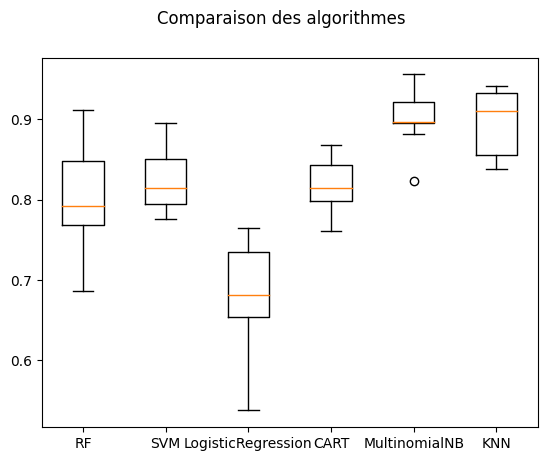

In [ ]:
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(name[0] for name in all_results)

On a un pipeline pour chaque prétraitement différent, on essaye pas mal (miniscule, lemmatisation, miniscule + lemmatisation..) et on stocke le fit_transorm de nos X_train, X_test sur les pipelines dans des listes qui vont contenir tous les fit_transform des pipelines pour chaque classifieur, par la suite on parcourt ces listes là, on itère dessus, et chaque élement de la liste (train) va passer par le GridSearch et puis on predict sur son corresapondant dans liste (test).

y_train (675,)
y_test (169,)
X_test (169,)
grid search fait
X_train (675, 24232)
y_train (675,)
Fitting 5 folds for each of 18 candidates, totalling 90 fits
meilleur score 0.853 

meilleur estimateur SVC(kernel='linear', random_state=42) 

Accuracy : 0.858
Classification Report
              precision    recall  f1-score   support

       FALSE    0.87342   0.83133   0.85185        83
        TRUE    0.84444   0.88372   0.86364        86

    accuracy                        0.85799       169
   macro avg    0.85893   0.85752   0.85774       169
weighted avg    0.85867   0.85799   0.85785       169

Ensemble des meilleurs paramètres :
	C: 1.0
	gamma: 'scale'
	kernel: 'linear'
grid search fait
X_train (675, 20676)
y_train (675,)
Fitting 5 folds for each of 18 candidates, totalling 90 fits
meilleur score 0.853 

meilleur estimateur SVC(kernel='linear', random_state=42) 

Accuracy : 0.888
Classification Report
              precision    recall  f1-score   support

       FALSE    0.92105  

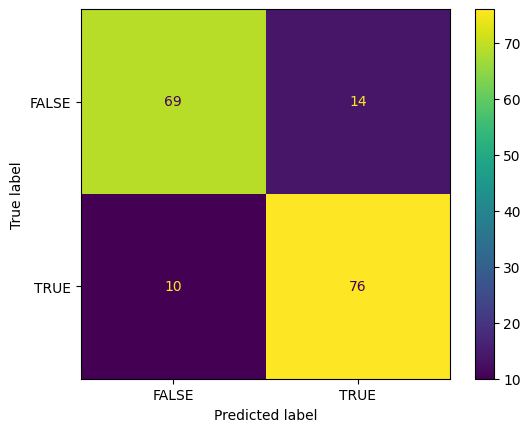

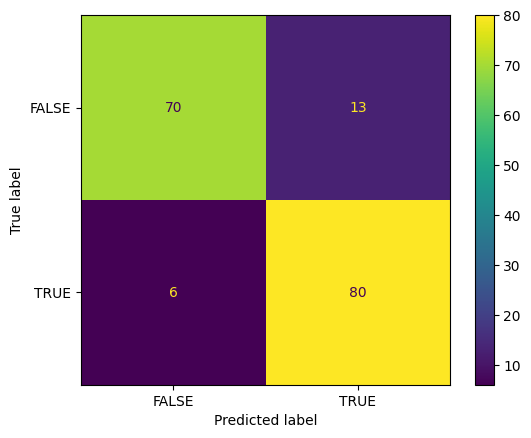

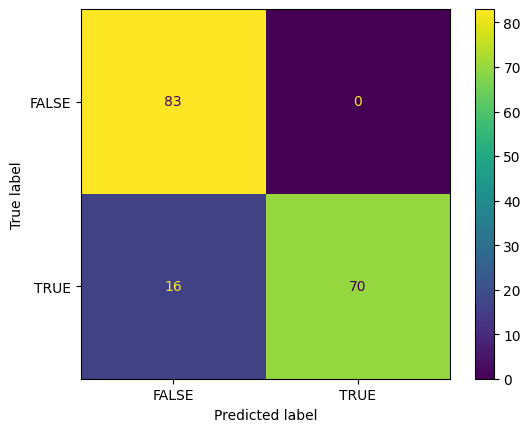

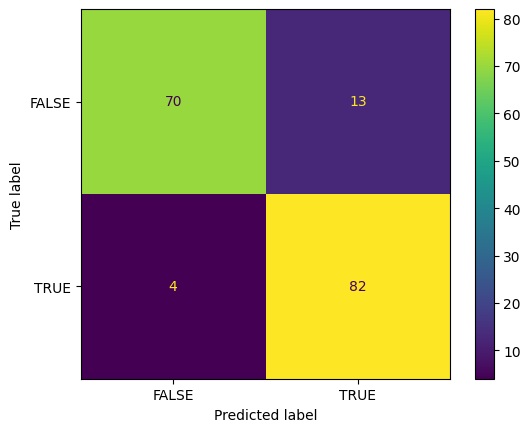

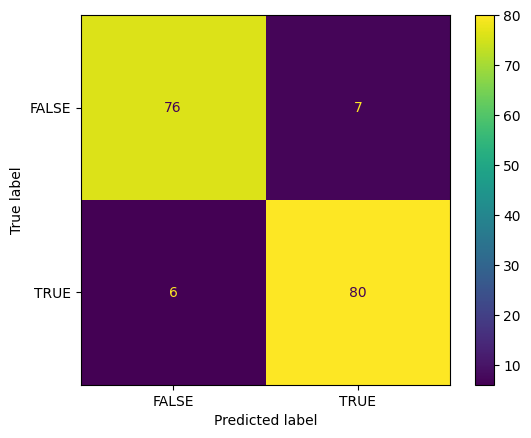

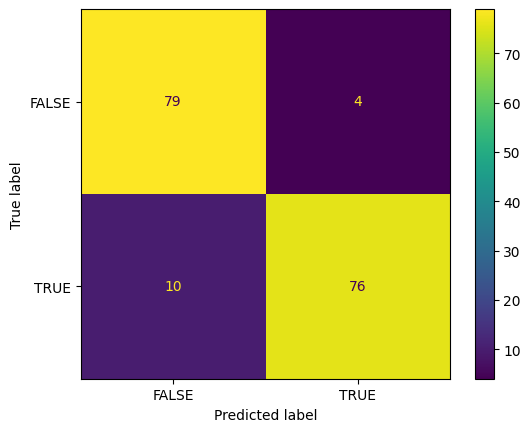

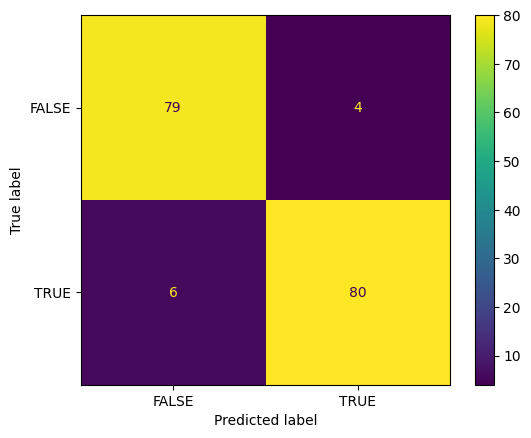

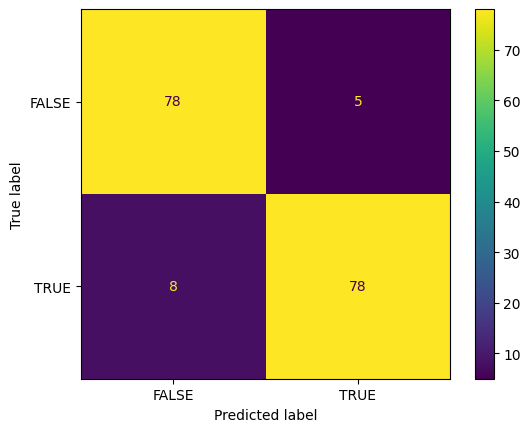

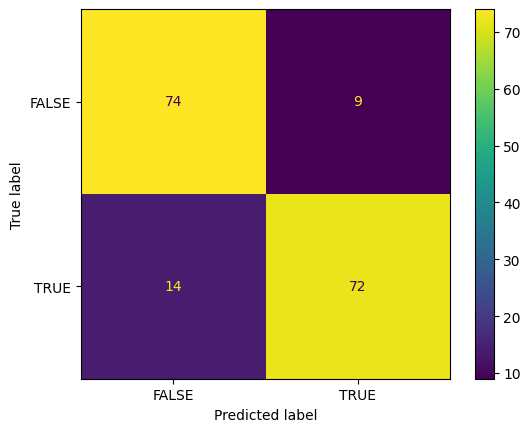

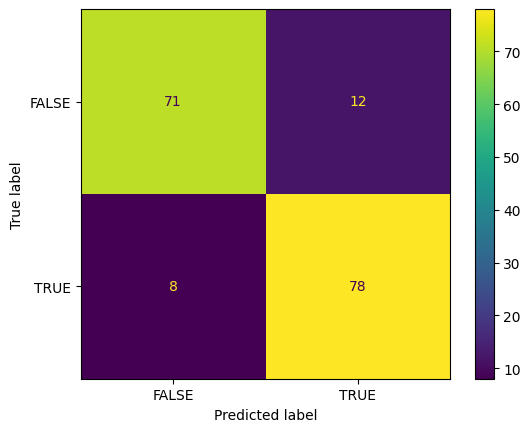

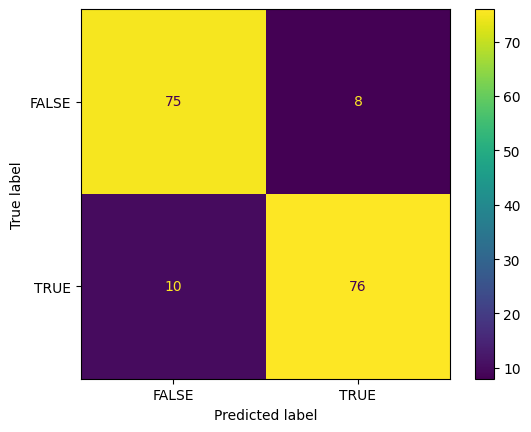

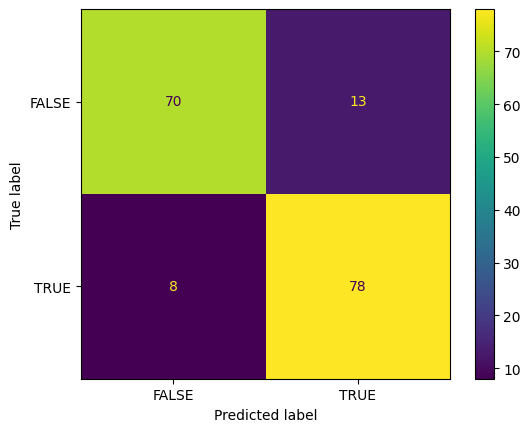

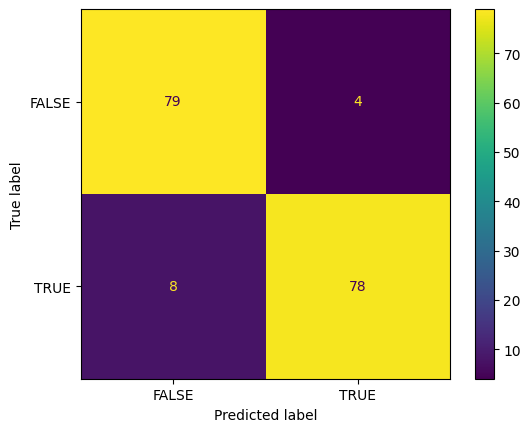

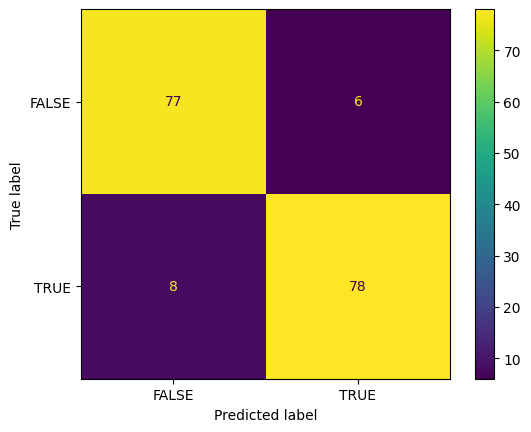

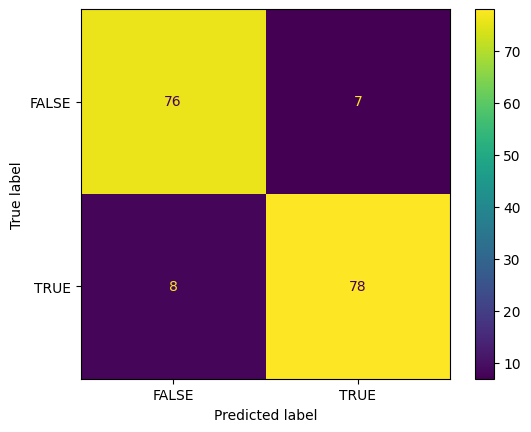

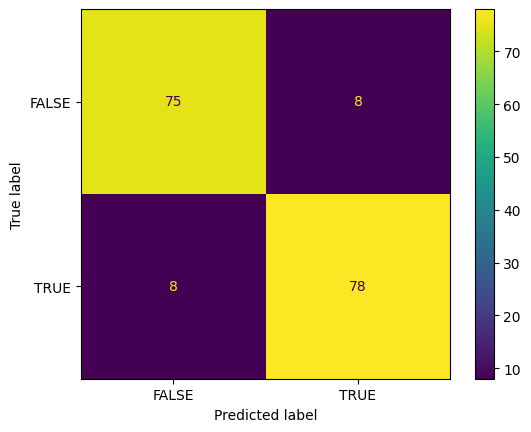

In [ ]:

np.random.seed(42)  # Set the random seed for NumPy
print("y_train", y_train.shape)
print("y_test", y_test.shape)
X_test = np.ravel(X_test)
print("X_test", X_test.shape)
# le plus simple est de faire un test sur differents pipelines.  
# pipeline de l'utilisation de CountVectorizer sur le texte avec differents pre-traitements
CV_brut = Pipeline([('cleaner', TextNormalizer()), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])
CV_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])
CV_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])

CV_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])

# pipeline de l'utilisation de TfidfVectorizer avec differents pre-traitements
TFIDF_brut = Pipeline ([('cleaner', TextNormalizer()), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])
TFIDF_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])


# Liste de tous les modeles à tester
all_models = [
    ("CV_brut", CV_brut),
    ("CV_lowcase", CV_lowcase),
    ("CV_lowStop", CV_lowStop),
    ("CV_lowStopstem",CV_lowStopstem),
    ("TFIDF_lowcase", TFIDF_lowcase),
    ("TFIDF_lowStop", TFIDF_lowStop),
    ("TFIDF_lowStopstem",TFIDF_lowStopstem),
    ("TFIDF_brut", TFIDF_brut)
]

X_train_text_SVC = []
X_test_text_SVC = []

X_train_text_RandomForestClassifier = []
X_test_text_RandomForestClassifier = []


for name, pipeline in all_models :
    X_train_text_SVC.append(pipeline.fit_transform(X_train).toarray())
    X_test_text_SVC.append(pipeline.transform(X_test).toarray())
    X_train_text_RandomForestClassifier.append(pipeline.fit_transform(X_train).toarray())
    X_test_text_RandomForestClassifier.append(pipeline.transform(X_test).toarray())




models = {
    'SVC': SVC(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42)
}
    

params = {'SVC': [{'C': [0.001, 0.01, 0.1, 1,2,5,7,10]},
             {'gamma': [0.001, 0.01, 0.1,0.2,0.3,0.5,0.7,1]},
             {'kernel': ['linear', 'rbf']}],
    'RandomForestClassifier': [{'n_estimators': [10, 50, 100, 200, 300]},
                              {'max_features': ['auto', 'sqrt', 'log2']}]
}

for model_name, model in models.items():
    score='accuracy'
    X_train_text = eval('X_train_text_' + model_name)
    X_test_text = eval('X_test_text_' + model_name)
    for i in range (len(X_train_text)):
      grid_search = GridSearchCV(model, params[model_name], n_jobs=-1,  verbose=1,scoring=score)
      print("grid search fait")
      print("X_train",X_train_text[i].shape)
      print("y_train",y_train.shape)
      grid_search.fit(X_train_text[i],y_train)
      print ('meilleur score %0.3f'%(grid_search.best_score_),'\n')
      print ('meilleur estimateur',grid_search.best_estimator_,'\n')
      y_pred = grid_search.predict(X_test_text[i])
      MyshowAllScores(y_test,y_pred)
      
      print("Ensemble des meilleurs paramètres :")
      best_parameters = grid_search.best_estimator_.get_params()
      for param_dict in params[model_name]:
        for param_name, param_value in param_dict.items():
            print("\t%s: %r" % (param_name, best_parameters[param_name]))

##**Etape 3 : Classification selon la colonne TEXT + extraction/application d'entités nommées**

Avant de classifier on applique les entités nommées, Cette fonction utilise Spacy pour extraire les entités nommées à partir d'une liste de  titres et les stocke dans une liste pour être affichées avec leurs labels correspondants.

In [ ]:
texte=dftrain['title']
#Créer une liste pour stocker les entités nommées
entities = []
# Traiter chaque texte individuellement et ajouter les entités à la liste
for phrase in texte:
    phrase_str = str(phrase)  # Convertir l'élément en chaîne de caractères
    doc = nlp(phrase_str)
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))


# Afficher les entités nommées
for entity in entities:
    print(entity[0], entity[1])
    


JK Rowling Confirms Stance Against Transgender Women ORG
MI Sec PERSON
State Official Caught On Video Telling Volunteers ORG
Antrim County GPE
Sarah Parker PERSON
Supreme Court ORG
Trump Leading PERSON
tens of thousands CARDINAL
Britain GPE
Ministry of Ayurveda, Yoga & Naturopathy ORG
Unani PERSON
Siddha PERSON
Homoeopathy PERSON
Ayurveda ORG
Siddha PERSON
Rand Paul PERSON
111 CARDINAL
NHS ORG
Scott Walker PERSON
Mary Burke PERSON
the last century DATE
1918 DATE
Cecile Viboud PERSON
the National Institutes of Health’s Fogarty International Center ORG
the “Great Influenza” ORG
an estimated 675,000 CARDINAL
the United States GPE
covid-19 PERSON
10 CARDINAL
covid-19 PERSON
covid-19 DATE
about 6 percent PERCENT
the United States GPE
less than 1 percent PERCENT
Coronavirus Updates ORG
New York GPE
Andrew M. Cuomo PERSON
Monday DATE
New York City GPE
25 percent PERCENT
8.8 million CARDINAL
more than 12,000 CARDINAL
covid-19 PERSON
another 5,000 CARDINAL
between 0.5 CARDINAL
0.8 percent PERCE

Cette fonction a pour but d'ajouter le type d'entité de chaque token détecté à coté de chaque entité détéctée dans le texte qu'elle prend en entrée, et retourne le texte modifié avec les informations ajoutées sur les entités nommées.

In [ ]:
def add_entity_name(text):
    if text is None or pd.isna(text):
        return ""

    doc = nlp(text)
    # Créer une liste pour stocker les nouveaux tokens
    nouveaux_tokens = []

    # Parcourir les tokens et ajouter des informations selon le type d'entité
    for token in doc:
        if token.ent_type_:
            # Ajouter le nom de l'entité (type d'entité) à côté de l'entité
            nouveaux_tokens.append(f"{token.text} ({token.ent_type_})")
        else:
            nouveaux_tokens.append(token.text)

    # Reconstruire le texte avec les informations ajoutées
    nouveau_texte = " ".join(nouveaux_tokens)
    return nouveau_texte

*Application de la fonction précédente à la colonne "title" avec la méthode apply*

In [ ]:
# Assurez-vous que la colonne "title" contient des chaînes de caractères
dftrain['title'] = dftrain['title'].astype(str)

# Appliquer la fonction à la colonne "title"
dftrain['title'] = dftrain['title'].apply(add_entity_name)

print(dftrain['title'])

615     JK (ORG) Rowling (ORG) Confirms (ORG) Stance (...
1303    MI (PERSON) Sec (PERSON) of State (ORG) Offici...
1232    What science can tell us about the links betwe...
2022    Sarah (PERSON) Parker (PERSON) leaves legacy o...
287     Current Actual Election Result Update : Presid...
                              ...                        
1006    Re : Meeting the need for isolation space for ...
1543    Breaking : Breonna (PERSON) Taylor (PERSON) ’s...
853     A quote from Politifact : Gates never said tha...
296     Before This Election , Newt (PERSON) Gingrich ...
1325     COVID19 PCR Tests are Scientifically Meaningless
Name: title, Length: 844, dtype: object


On scinde les données de la colonne "title" en jeu d'apprentissage et jeu de test

In [ ]:
X=dftrain['title']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=8)
print("X_train is \n",X_train.shape)
print("y_train is \n",y_train.shape)
print("X_test is \n",X_test.shape)
print("y_test is \n",y_test.shape)

X_train is 
 (675,)
y_train is 
 (675,)
X_test is 
 (169,)
y_test is 
 (169,)


Ici, c'est une étape importante, on va tester différents classifieurs, pour chacun des classifieurs, on va appliquer le prétraitement + Vectorisation TfIdf, et on applique une cross_val_score avec un Kfold de 10 fois, par la suite on stocke dans une liste all_results la moyenne des accuracy + l'écart type et on la trie par ordre décroissant de moyenne d'accuracy et d'écart type. on remarque que les 2 meilleurs sont SVM et RF qu'on va séléctionner pour leur appliquer le GridSearch sur les paramètres des prétraitements + leurs hyperparamètres pour pouvoir choisir le meilleur.

In [ ]:

np.random.seed(42)  # Set the random seed for NumPy

score = 'accuracy'
seed = 7        
allresults = []
results = []
names = []


# Liste des modèles à tester
models = [
    ('MultinomialNB', MultinomialNB()),
    ('LogisticRegression', LogisticRegression(random_state=42))
]


models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=42)))
models.append(('RF', RandomForestClassifier(random_state=42)))
models.append(('SVM', SVC(random_state=42)))

# Création d'un pipeline pour chaque modèle
pipelines = []
for name,model in models:
    pipeline = Pipeline([
        ('normalize', TextNormalizer()),
        ('tfidf', TfidfVectorizer()),
        (name,model)
    ])
    pipelines.append((name,pipeline))
    #pipeline.fit(X_train,y_train)
all_results=[]
scores=[]
for p in pipelines:
    print(p[1])
    # cross validation en 10 fois
    kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
    
#    print ("Evaluation de ",p)
    start_time = time.time()
    # application de la classification
    cv_results = cross_val_score(p[1],X_train,y_train, cv=kfold, scoring=score)
    #print("Pour le classifieur",p[0],"on a un score de",cv_results.mean(),"et un écart type de",cv_results.std())
    scores.append(cv_results)

    all_results.append((p[0],cv_results.mean(),cv_results.std()))
    end_time = time.time()


print("all resultats", all_results)

all_results = sorted(all_results, key=lambda x: (-x[1], -x[2]))
print("all resultats", all_results)
    # affichage des résultats
#print ('\nLe meilleur resultat : ',max(results))


X_train (675,)
y_train (675,)
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('MultinomialNB', MultinomialNB())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('LogisticRegression', LogisticRegression(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('KNN', KNeighborsClassifier())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('CART', DecisionTreeClassifier(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('RF', RandomForestClassifier(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('SVM', SVC(random_state=42))])
all resultats [('MultinomialNB', 0.7926031606672521, 0.06432746085775896), ('LogisticRegression', 0.7867427568042142, 0.0589446324581

*On* affiche les boites à moustache pour mieux visualiser les résultats

[Text(1, 0, 'SVM'),
 Text(2, 0, 'RF'),
 Text(3, 0, 'CART'),
 Text(4, 0, 'MultinomialNB'),
 Text(5, 0, 'LogisticRegression'),
 Text(6, 0, 'KNN')]

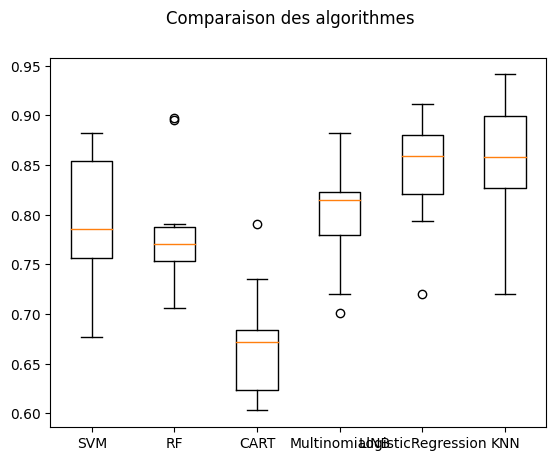

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(name[0] for name in all_results)

On a un pipeline pour chaque prétraitement différent, on essaye pas mal (miniscule, lemmatisation, miniscule + lemmatisation..) et on stocke le fit_transorm de nos X_train, X_test sur les pipelines dans des listes qui vont contenir tous les fit_transform des pipelines pour chaque classifieur, par la suite on parcourt ces listes là, on itère dessus, et chaque élement de la liste (train) va passer par le GridSearch et puis on predict sur son corresapondant dans liste (test).

y_train (675,)
y_test (169,)
X_test (169,)
grid search fait
X_train (675, 5737)
y_train (675,)
Fitting 5 folds for each of 18 candidates, totalling 90 fits
meilleur score 0.828 

meilleur estimateur SVC(gamma=0.5, random_state=42) 

Accuracy : 0.911
Classification Report
              precision    recall  f1-score   support

       FALSE    0.85417   0.98795   0.91620        83
        TRUE    0.98630   0.83721   0.90566        86

    accuracy                        0.91124       169
   macro avg    0.92023   0.91258   0.91093       169
weighted avg    0.92141   0.91124   0.91084       169

Ensemble des meilleurs paramètres :
	C: 1.0
	gamma: 0.5
	kernel: 'rbf'
grid search fait
X_train (675, 4858)
y_train (675,)
Fitting 5 folds for each of 18 candidates, totalling 90 fits
meilleur score 0.831 

meilleur estimateur SVC(gamma=0.5, random_state=42) 

Accuracy : 0.911
Classification Report
              precision    recall  f1-score   support

       FALSE    0.85417   0.98795   0.91620   

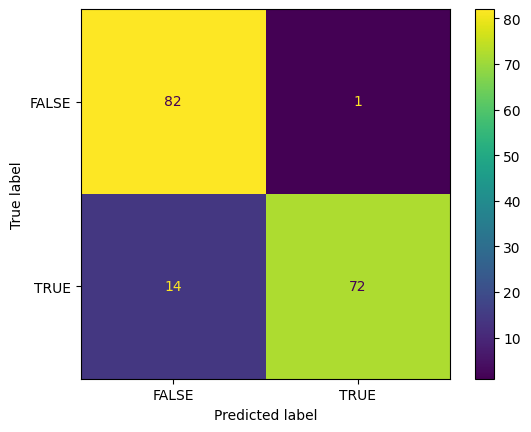

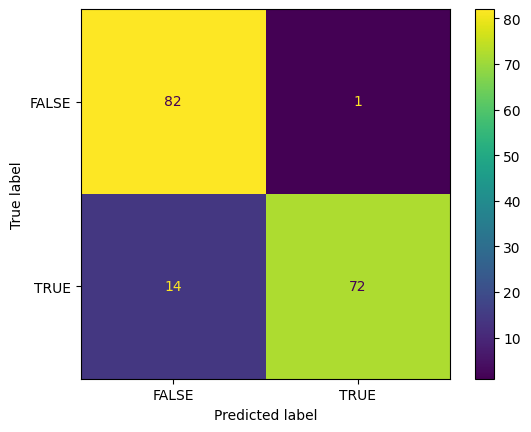

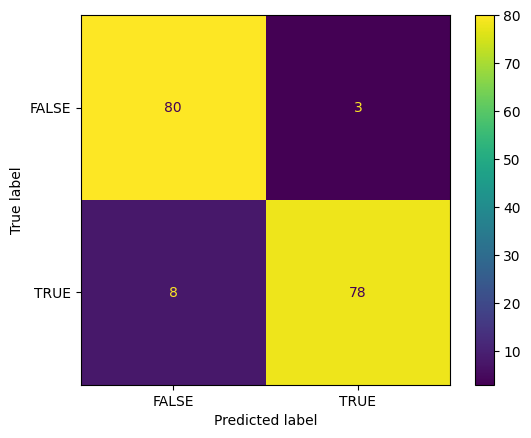

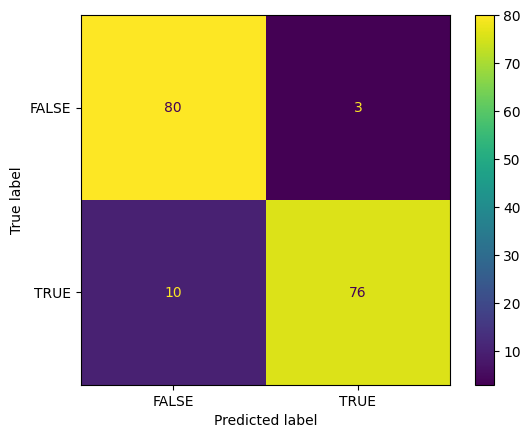

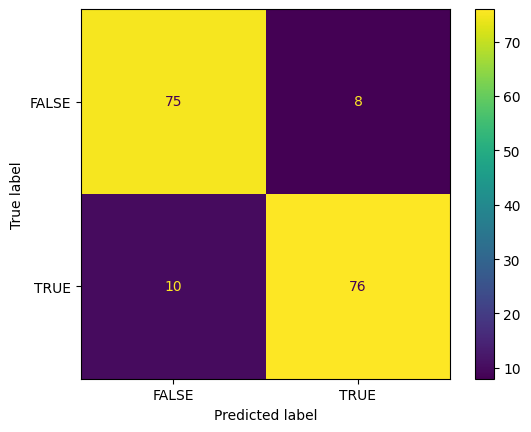

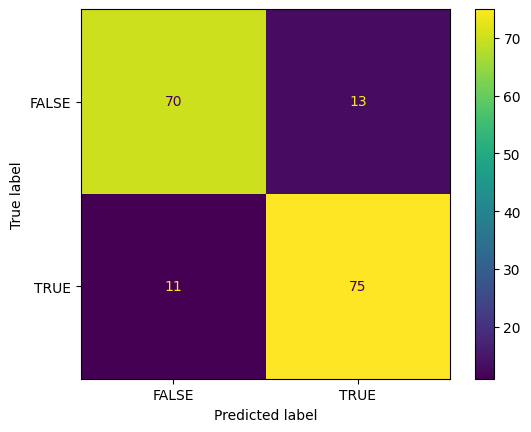

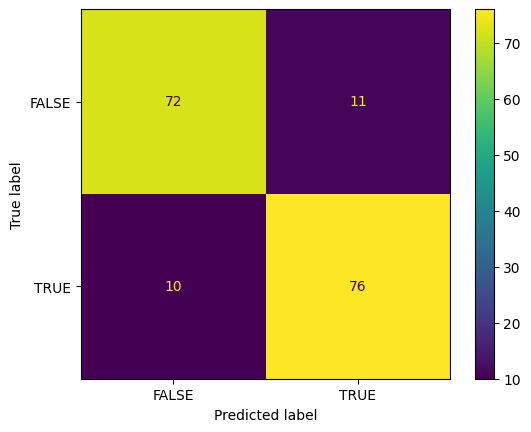

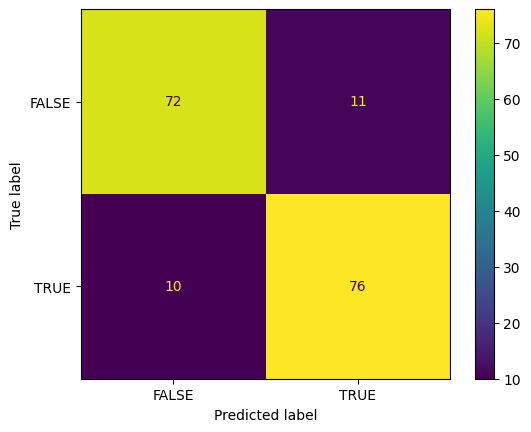

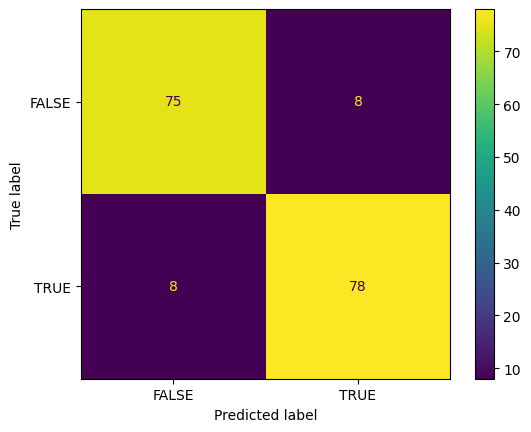

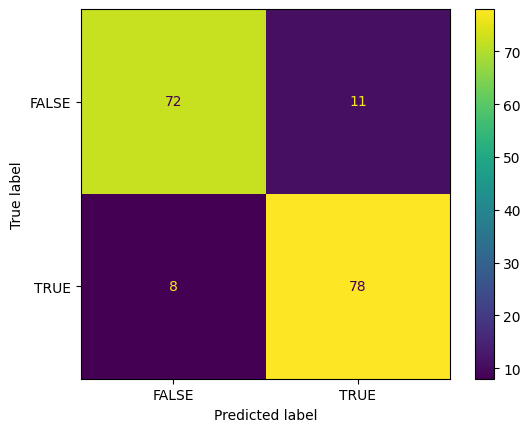

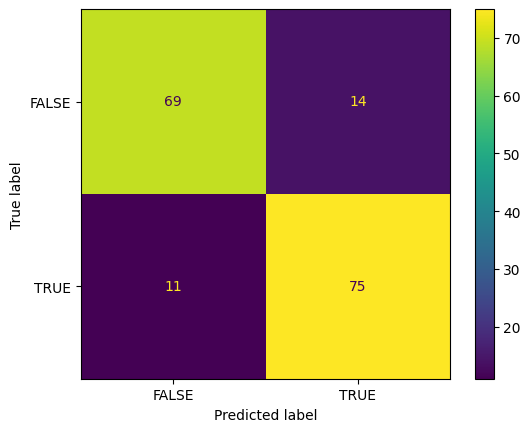

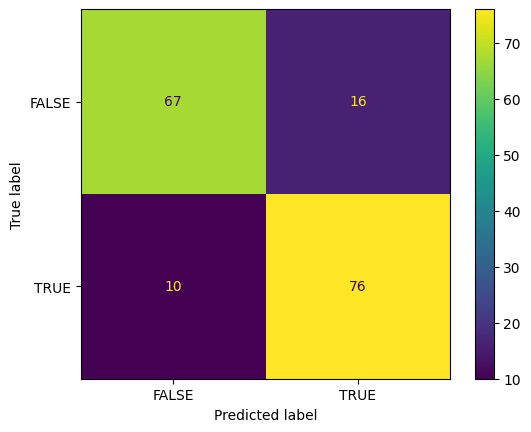

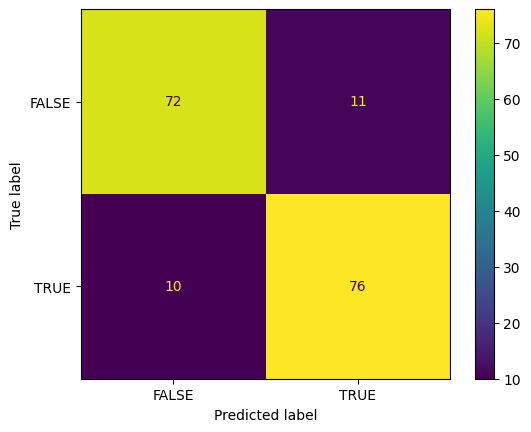

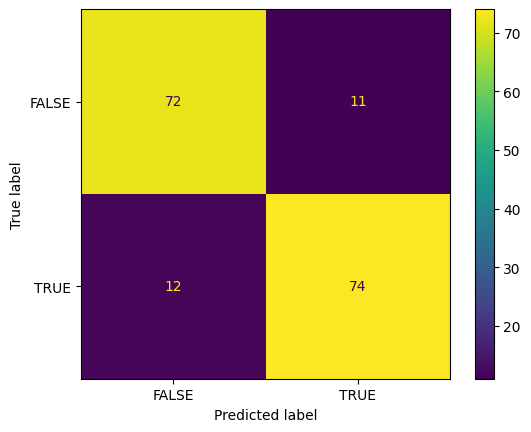

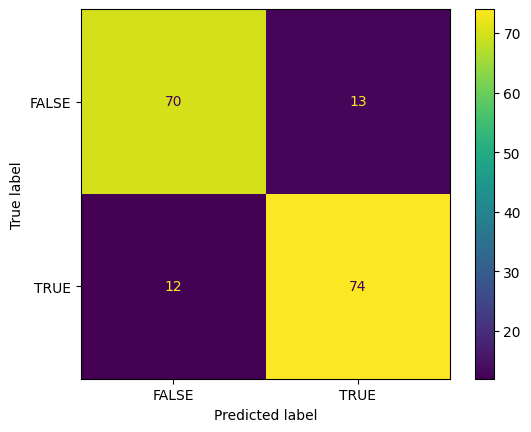

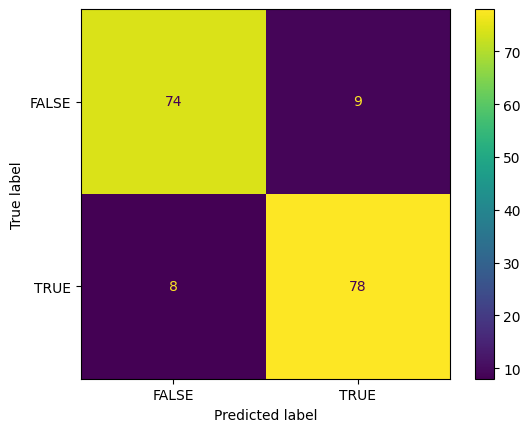

In [ ]:
np.random.seed(42)  # Set the random seed for NumPy
# le plus simple est de faire un test sur differents pipelines.  
# pipeline de l'utilisation de CountVectorizer sur le texte avec differents pre-traitements
CV_brut = Pipeline([('cleaner', TextNormalizer()), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])
CV_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])
CV_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])

CV_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])

# pipeline de l'utilisation de TfidfVectorizer avec differents pre-traitements
TFIDF_brut = Pipeline ([('cleaner', TextNormalizer()), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])
TFIDF_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])


# Liste de tous les modeles à tester
all_models = [
    ("CV_brut", CV_brut),
    ("CV_lowcase", CV_lowcase),
    ("CV_lowStop", CV_lowStop),
    ("CV_lowStopstem",CV_lowStopstem),
    ("TFIDF_lowcase", TFIDF_lowcase),
    ("TFIDF_lowStop", TFIDF_lowStop),
    ("TFIDF_lowStopstem",TFIDF_lowStopstem),
    ("TFIDF_brut", TFIDF_brut)
]

X_train_title_SVC = []
X_test_title_SVC = []

X_train_title_RandomForestClassifier = []
X_test_title_RandomForestClassifier = []


for name, pipeline in all_models :
    X_train_title_SVC.append(pipeline.fit_transform(X_train).toarray())
    X_test_title_SVC.append(pipeline.transform(X_test).toarray())
    X_train_title_RandomForestClassifier.append(pipeline.fit_transform(X_train).toarray())
    X_test_title_RandomForestClassifier.append(pipeline.transform(X_test).toarray())




models = {
    'SVC': SVC(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42)
}
    

params = {'SVC': [{'C': [0.001, 0.01, 0.1, 1,2,5,7,10]},
             {'gamma': [0.001, 0.01, 0.1,0.2,0.3,0.5,0.7,1]},
             {'kernel': ['linear', 'rbf']}],
    'RandomForestClassifier': [{'n_estimators': [10, 50, 100, 200, 300]},
                              {'max_features': ['auto', 'sqrt', 'log2']}]
}

for model_name, model in models.items():
    score='accuracy'
    X_train_title = eval('X_train_title_' + model_name)
    X_test_title = eval('X_test_title_' + model_name)
    for i in range (len(X_train_title)):
      grid_search = GridSearchCV(model, params[model_name], n_jobs=-1,  verbose=1,scoring=score)
      print("grid search fait")
      print("X_train",X_train_title[i].shape)
      print("y_train",y_train.shape)
      grid_search.fit(X_train_title[i],y_train)
      print ('meilleur score %0.3f'%(grid_search.best_score_),'\n')
      print ('meilleur estimateur',grid_search.best_estimator_,'\n')
      y_pred = grid_search.predict(X_test_title[i])
      MyshowAllScores(y_test,y_pred)
      
      print("Ensemble des meilleurs paramètres :")
      best_parameters = grid_search.best_estimator_.get_params()
      for param_dict in params[model_name]:
        for param_name, param_value in param_dict.items():
            print("\t%s: %r" % (param_name, best_parameters[param_name]))

##**Etape 4 : Classification selon la colonne TEXT_TITLE + extraction/application d'entités nommées**

Tests de Classification pour trouver le meilleur classifieur, les meilleurs paramètres de prétraitement et les meilleurs hyper_paramètres.

Avant de classifier on applique les entités nommées, Cette fonction utilise Spacy pour extraire les entités nommées à partir d'une liste de textes et les stocke dans une liste pour être affichées avec leurs labels correspondants.

concaténation des cellules "text" et "title"

In [ ]:

text_title = dftrain.apply(lambda x : '{} {}'.format(x['text'],x['title']),axis=1)

dftrain['text_title'] = text_title
X_text_title = dftrain.iloc[0:,-1]
X_text_title.reset_index(drop = True, inplace = True)


Cette fonction a pour but d'ajouter le type d'entité de chaque token détecté à coté de chaque entité détéctée dans le texte qu'elle prend en entrée, et retourne le texte modifié avec les informations ajoutées sur les entités nommées.

In [ ]:
texte=dftrain['text_title']
#Créer une liste pour stocker les entités nommées
entities = []
# Traiter chaque texte individuellement et ajouter les entités à la liste
for phrase in texte:
    doc = nlp(phrase)
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))

# Afficher les entités nommées
for entity in entities:
    print(entity[0], entity[1])


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
FAC ORG
96 (PERCENT) % PERCENT
China GPE
GPE ORG
U.S. GPE
CARDINAL ORG
CARDINAL ORG
2 CARDINAL
CARDINAL ORG
CARDINAL ORG
Wuhan GPE
GPE ORG
China GPE
GPE ORG
GPE ORG
Newsweek ORG
ORG ORG
April DATE
2020 DATE
NIH ORG
ORG ORG
Anthony PERSON
CARDINAL ORG
CARDINAL ORG
200 CARDINAL
CARDINAL ORG
2014 DATE
U.S. GPE
GPE ORG
Fauci PERSON
ORG ORG
2017 DATE
April DATE
2020 DATE
Wuhan GPE
ORG) Institute ORG
China GPE
GPE ORG
Fauci (ORG) 's ORG
ORG ORG
Steve PERSON
Fox ORG
ORG ORG
The (WORK_OF_ART) WORK_OF_ART
Yunnan GPE
GPE ORG
GPE ORG
Wuhan GPE
GPE ORG
1,000 CARDINAL
QUANTITY ORG
miles PERSON
QUANTITY ORG
Hilton PERSON
Sunday DATE
Wuhan GPE
GPE ORG
February DATE
2020 DATE
Yunnan GPE
GPE ORG
COVID-19 PERSON
Hilton PERSON
NIH ORG
ORG ORG
GenBank ORG
ORG ORG
CARDINAL ORG
CARDINAL ORG
COVID-19 ORG
ORG ORG
Yunnan GPE
GPE ORG
Hilton GPE
GPE ORG
Wuhan GPE
GPE ORG
Yunnan GPE
GPE ORG
GenBank ORG
ORG ORG
Yunnan GPE
GPE ORG
Wuhan G

*Application de la fonction précédente à la colonne "title" avec la méthode apply*

In [ ]:

# Définir une fonction pour ajouter le nom de l'entité à chaque entité nommée dans la colonne de texte
def add_entity_name(text):
    doc = nlp(text)
    # Créer une liste pour stocker les nouveaux tokens
    nouveaux_tokens = []

    # Parcourir les tokens et ajouter des informations selon le type d'entité
    for token in doc:
        if token.ent_type_:
            # Ajouter le nom de l'entité (type d'entité) à côté de l'entité
            nouveaux_tokens.append(f"{token.text} ({token.ent_type_})")
        else:
            nouveaux_tokens.append(token.text)

    # Reconstruire le texte avec les informations ajoutées
    nouveau_texte = " ".join(nouveaux_tokens)
    return nouveau_texte

In [ ]:
 #Application de la fonction à la colonne "titre_text"
#dftrain["entities"] = dftrain["text_title"].apply(extract_entities)
#print(dftrain["entities"])
dftrain['text_title'].fillna('', inplace=True)
dftrain['text_title'] = dftrain['text_title'].apply(add_entity_name)


On scinde les données de la colonne "title" en jeu d'apprentissage et jeu de test

In [ ]:
X=dftrain['text_title']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=8)
print("X_train is \n",X_train.shape)
print("y_train is \n",y_train.shape)
print("X_test is \n",X_test.shape)
print("y_test is \n",y_test.shape)

X_train is 
 (675,)
y_train is 
 (675,)
X_test is 
 (169,)
y_test is 
 (169,)


Ici, c'est une étape importante, on va tester différents classifieurs, pour chacun des classifieurs, on va appliquer le prétraitement + Vectorisation TfIdf, et on applique une cross_val_score avec un Kfold de 10 fois, par la suite on stocke dans une liste all_results la moyenne des accuracy + l'écart type et on la trie par ordre décroissant de moyenne d'accuracy et d'écart type. on remarque que les 2 meilleurs sont SVM et RF qu'on va séléctionner pour leur appliquer le GridSearch sur les paramètres des prétraitements + leurs hyperparamètres pour pouvoir choisir le meilleur.

In [ ]:

np.random.seed(42)  # Set the random seed for NumPy

score = 'accuracy'
seed = 7        
allresults = []
results = []
names = []


# Liste des modèles à tester
models = [
    ('MultinomialNB', MultinomialNB()),
    ('LogisticRegression', LogisticRegression(random_state=42))
]


models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=42)))
models.append(('RF', RandomForestClassifier(random_state=42)))
models.append(('SVM', SVC(random_state=42)))

# Création d'un pipeline pour chaque modèle
pipelines = []
for name,model in models:
    pipeline = Pipeline([
        ('normalize', TextNormalizer()),
        ('tfidf', TfidfVectorizer()),
        (name,model)
    ])
    pipelines.append((name,pipeline))
    #pipeline.fit(X_train,y_train)
all_results=[]
scores=[]
for p in pipelines:
    print(p[1])
    # cross validation en 10 fois
    kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
    
#    print ("Evaluation de ",p)
    start_time = time.time()
    # application de la classification
    cv_results = cross_val_score(p[1],X_train,y_train, cv=kfold, scoring=score)
    #print("Pour le classifieur",p[0],"on a un score de",cv_results.mean(),"et un écart type de",cv_results.std())
    scores.append(cv_results)

    all_results.append((p[0],cv_results.mean(),cv_results.std()))
    end_time = time.time()


print("all resultats", all_results)

all_results = sorted(all_results, key=lambda x: (-x[1], -x[2]))
print("all resultats", all_results)
    # affichage des résultats
#print ('\nLe meilleur resultat : ',max(results))


X_train (675,)
y_train (675,)
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('MultinomialNB', MultinomialNB())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('LogisticRegression', LogisticRegression(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('KNN', KNeighborsClassifier())])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('CART', DecisionTreeClassifier(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('RF', RandomForestClassifier(random_state=42))])
Pipeline(steps=[('normalize', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('SVM', SVC(random_state=42))])
all resultats [('MultinomialNB', 0.7879719051799824, 0.08755580534737224), ('LogisticRegression', 0.7852941176470589, 0.0497737924249

On a un pipeline pour chaque prétraitement différent, on essaye pas mal (miniscule, lemmatisation, miniscule + lemmatisation..) et on stocke le fit_transorm de nos X_train, X_test sur les pipelines dans des listes qui vont contenir tous les fit_transform des pipelines pour chaque classifieur, par la suite on parcourt ces listes là, on itère dessus, et chaque élement de la liste (train) va passer par le GridSearch et puis on predict sur son corresapondant dans liste (test).

y_train (675,)
y_test (169,)
X_test (169,)
grid search fait
X_train (675, 25358)
y_train (675,)
Fitting 5 folds for each of 18 candidates, totalling 90 fits
meilleur score 0.839 

meilleur estimateur SVC(kernel='linear', random_state=42) 

Accuracy : 0.852
Classification Report
              precision    recall  f1-score   support

       FALSE    0.91429   0.77108   0.83660        83
        TRUE    0.80808   0.93023   0.86486        86

    accuracy                        0.85207       169
   macro avg    0.86118   0.85066   0.85073       169
weighted avg    0.86024   0.85207   0.85098       169

Ensemble des meilleurs paramètres :
	C: 1.0
	gamma: 'scale'
	kernel: 'linear'
grid search fait
X_train (675, 21325)
y_train (675,)
Fitting 5 folds for each of 18 candidates, totalling 90 fits
meilleur score 0.837 

meilleur estimateur SVC(gamma=0.01, random_state=42) 

Accuracy : 0.905
Classification Report
              precision    recall  f1-score   support

       FALSE    0.83838   1.00

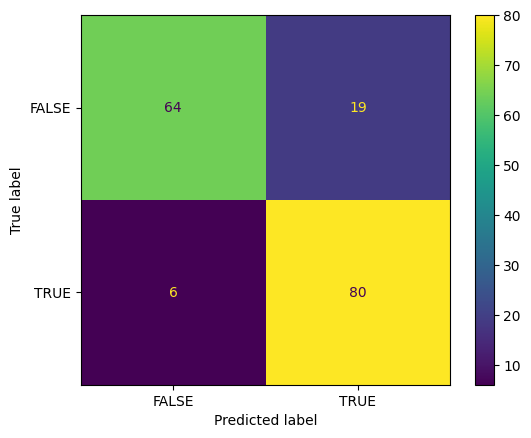

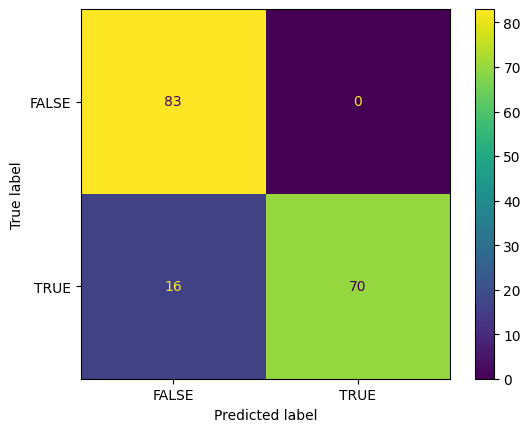

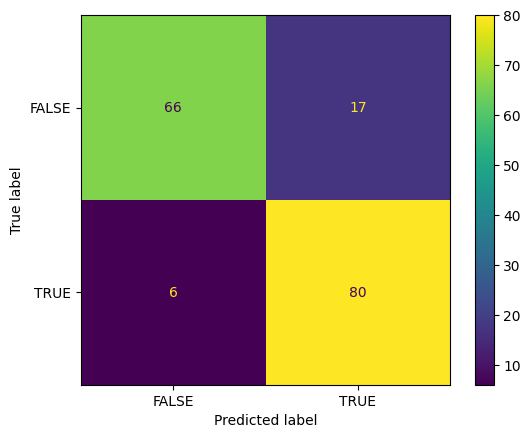

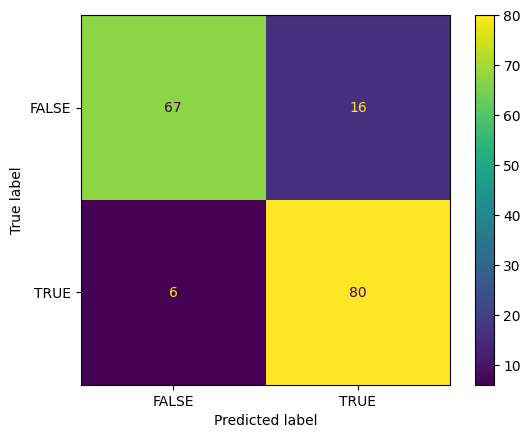

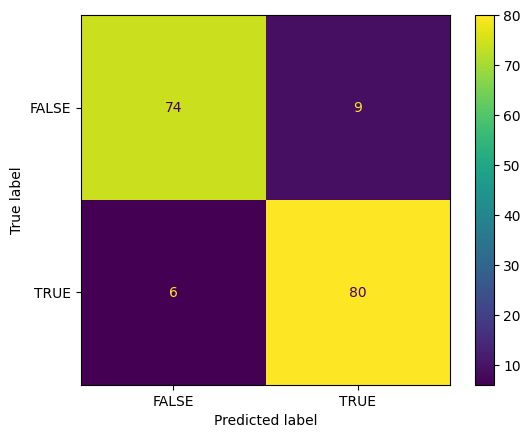

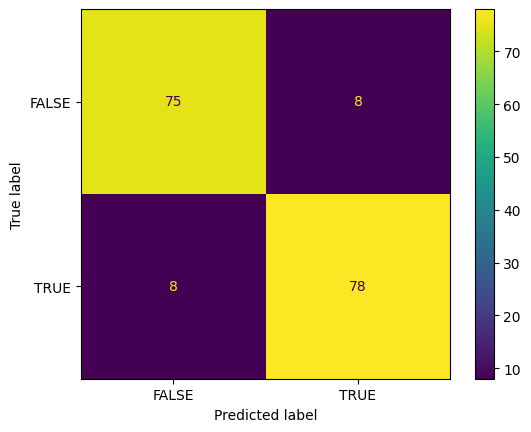

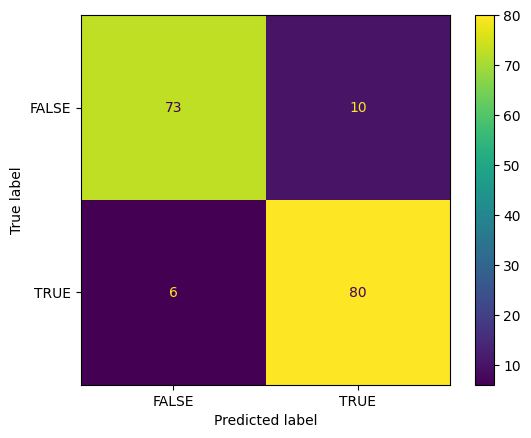

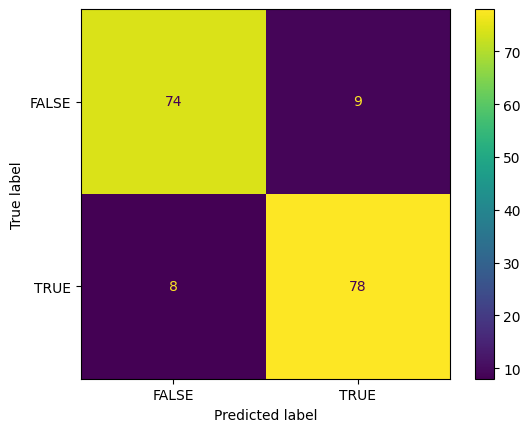

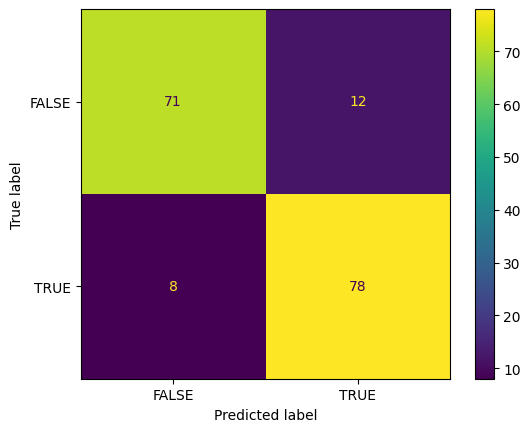

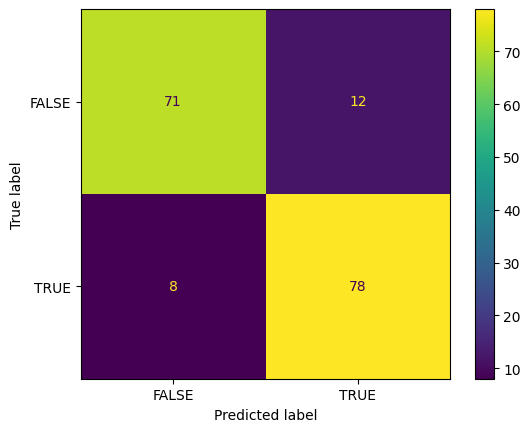

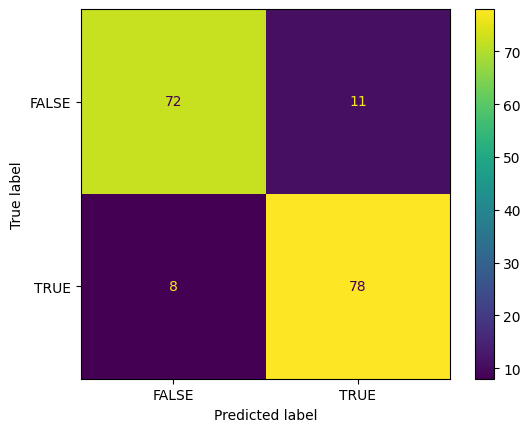

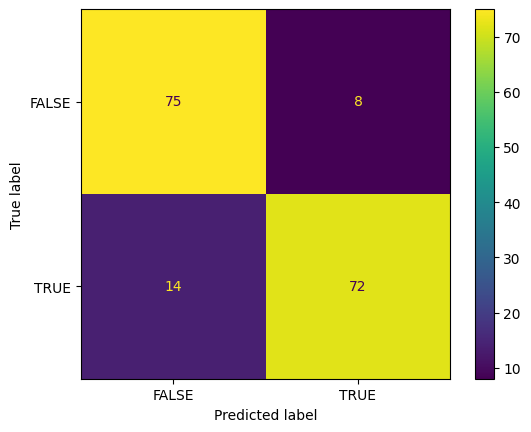

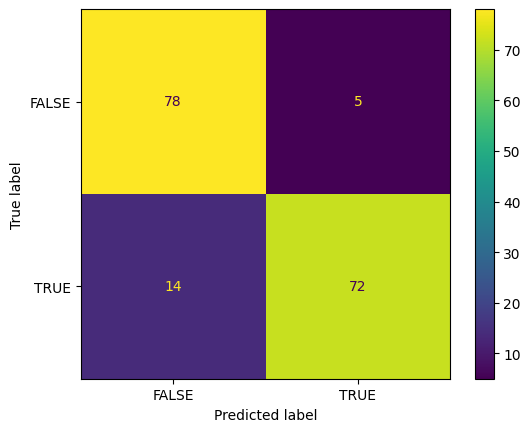

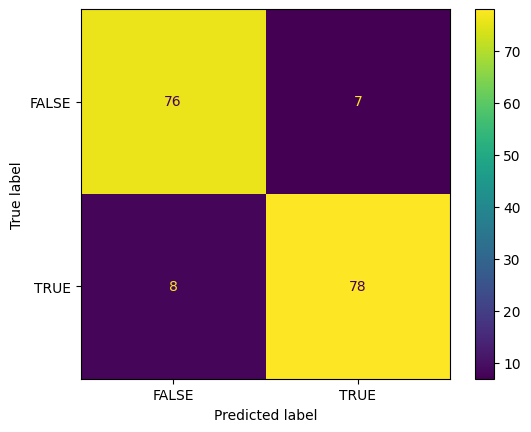

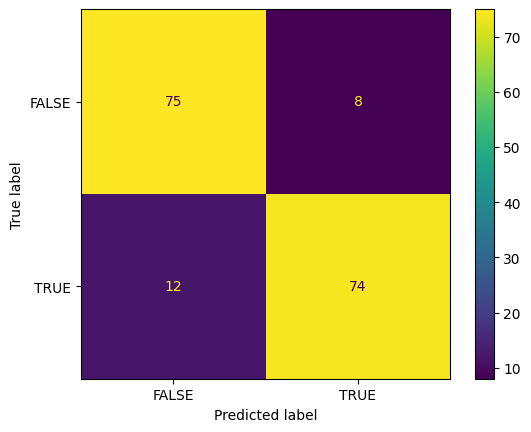

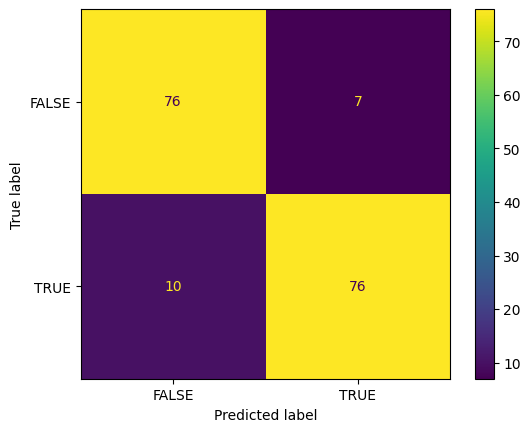

In [ ]:

# le plus simple est de faire un test sur differents pipelines.  
# pipeline de l'utilisation de CountVectorizer sur le texte avec differents pre-traitements
CV_brut = Pipeline([('cleaner', TextNormalizer()), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])
CV_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])
CV_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])

CV_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False))])

# pipeline de l'utilisation de TfidfVectorizer avec differents pre-traitements
TFIDF_brut = Pipeline ([('cleaner', TextNormalizer()), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])
TFIDF_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])

TFIDF_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False))])


# Liste de tous les modeles à tester
all_models = [
    ("CV_brut", CV_brut),
    ("CV_lowcase", CV_lowcase),
    ("CV_lowStop", CV_lowStop),
    ("CV_lowStopstem",CV_lowStopstem),
    ("TFIDF_lowcase", TFIDF_lowcase),
    ("TFIDF_lowStop", TFIDF_lowStop),
    ("TFIDF_lowStopstem",TFIDF_lowStopstem),
    ("TFIDF_brut", TFIDF_brut)
]

X_train_text_SVC = []
X_test_text_SVC = []

X_train_text_RandomForestClassifier = []
X_test_text_RandomForestClassifier = []


for name, pipeline in all_models :
    X_train_text_SVC.append(pipeline.fit_transform(X_train).toarray())
    X_test_text_SVC.append(pipeline.transform(X_test).toarray())
    X_train_text_RandomForestClassifier.append(pipeline.fit_transform(X_train).toarray())
    X_test_text_RandomForestClassifier.append(pipeline.transform(X_test).toarray())




models = {
    'SVC': SVC(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42)
}
    

params = {'SVC': [{'C': [0.001, 0.01, 0.1, 1,2,5,7,10]},
             {'gamma': [0.001, 0.01, 0.1,0.2,0.3,0.5,0.7,1]},
             {'kernel': ['linear', 'rbf']}],
    'RandomForestClassifier': [{'n_estimators': [10, 50, 100, 200, 300]},
                              {'max_features': ['auto', 'sqrt', 'log2']}]
}

for model_name, model in models.items():
    score='accuracy'
    X_train_text = eval('X_train_text_' + model_name)
    X_test_text = eval('X_test_text_' + model_name)
    for i in range (len(X_train_text)):
      grid_search = GridSearchCV(model, params[model_name], n_jobs=-1,  verbose=1,scoring=score)
      print("grid search fait")
      print("X_train",X_train_text[i].shape)
      print("y_train",y_train.shape)
      grid_search.fit(X_train_text[i],y_train)
      print ('meilleur score %0.3f'%(grid_search.best_score_),'\n')
      print ('meilleur estimateur',grid_search.best_estimator_,'\n')
      y_pred = grid_search.predict(X_test_text[i])
      MyshowAllScores(y_test,y_pred)
      
      print("Ensemble des meilleurs paramètres :")
      best_parameters = grid_search.best_estimator_.get_params()
      for param_dict in params[model_name]:
        for param_name, param_value in param_dict.items():
            print("\t%s: %r" % (param_name, best_parameters[param_name]))